# **Estudo Dirigido: ACO**
Implementando o Algoritmo Colônia de Formigas (ACO) para o problema do Caixeiro Viajante (TSP)

**Parâmetros do ACO:**

1. Matriz de Distâncias (distances): Esta matriz representa as distâncias entre todas as cidades no problema que está sendo resolvido. É uma entrada fundamental para o ACO, pois as formigas usam essas informações para escolher seus caminhos.

2. Número de Formigas (num_ants): É a quantidade de formigas que serão utilizadas pelo algoritmo para explorar o espaço de busca. Um número maior de formigas geralmente leva a uma exploração mais eficiente, mas também aumenta o custo computacional.

3. Número de Nós (num_nodes): Representa o número total de cidades no problema do caixeiro viajante. Este parâmetro é usado para inicializar a matriz de feromônios e a matriz de distâncias.

4. Parâmetro Alpha (alpha): Controla a importância do feromônio na escolha do próximo nó. Um valor maior de alpha faz com que as formigas deem mais importância ao feromônio, o que pode levar a uma exploração mais intensa do espaço de busca.

5. Parâmetro Beta (beta): Controla a influência da distância na escolha do próximo nó. Um valor maior de beta faz com que as formigas deem mais importância à distância, o que pode levar a uma exploração mais direta do espaço de busca.

6. Taxa de Evaporação (evaporation_rate): Define a taxa na qual o feromônio evapora ao longo do tempo. Uma taxa de evaporação mais alta permite que o feromônio se dissipe mais rapidamente, o que pode ajudar o algoritmo a escapar de mínimos locais.

In [ ]:
# Primeiro, instale as bibliotecas necessárias
!pip install matplotlib
!pip install numpy

In [2]:
# 1. Importar bibliotecas necessárias:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 2. Definir a classe AntColony:
class AntColony:
    def __init__(self, distances, num_ants, num_nodes, alpha, beta, evaporation_rate):
        self.distances = distances
        self.num_ants = num_ants
        self.num_nodes = num_nodes
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.pheromone_matrix = np.ones((num_nodes, num_nodes)) / num_nodes

    def update_pheromones(self, paths, path_costs):
        self.pheromone_matrix *= (1 - self.evaporation_rate)
        for path, cost in zip(paths, path_costs):
            for i in range(len(path) - 1):
                current, next_node = path[i], path[i + 1]
                self.pheromone_matrix[current][next_node] += 1 / cost

    def select_next_node(self, current_node, allowed_nodes):
        probabilities = np.power(self.pheromone_matrix[current_node][allowed_nodes], self.alpha) * \
                        np.power(1 / self.distances[current_node][allowed_nodes], self.beta)
        probabilities /= np.sum(probabilities)
        next_node = np.random.choice(allowed_nodes, p=probabilities)
        return next_node    

In [4]:
# 3. Definir a função para calcular o custo do caminho:
def calculate_path_cost(path, distances):
    cost = 0
    for i in range(len(path) - 1):
        cost += distances[path[i]][path[i + 1]]
    return cost

In [5]:
# 4. Definir a função para o algoritmo ACO:

def aco(distances, num_ants, num_iterations, alpha, beta, evaporation_rate):
    num_nodes = len(distances)
    ant_colony = AntColony(distances, num_ants, num_nodes, alpha, beta, evaporation_rate)
    best_path = None
    best_path_cost = float('inf')

    for _ in range(num_iterations):
        paths = []
        path_costs = []
        for _ in range(num_ants):
            visited_nodes = []
            current_node = np.random.randint(num_nodes)
            visited_nodes.append(current_node)
            allowed_nodes = set(range(num_nodes))
            allowed_nodes.remove(current_node)
            while allowed_nodes:
                next_node = ant_colony.select_next_node(current_node, list(allowed_nodes))
                visited_nodes.append(next_node)
                allowed_nodes.remove(next_node)
                current_node = next_node
            paths.append(visited_nodes)
            path_cost = calculate_path_cost(visited_nodes, distances)
            path_costs.append(path_cost)
            if path_cost < best_path_cost:
                best_path = visited_nodes
                best_path_cost = path_cost
        ant_colony.update_pheromones(paths, path_costs)

    return best_path, best_path_cost

In [6]:
# 5. Definir os dados do problema e executar o algoritmo ACO:

# Matriz de distâncias entre as cidades (exemplo)
distances = np.array([[0, 10, 15, 20],
                      [10, 0, 35, 25],
                      [15, 35, 0, 30],
                      [20, 25, 30, 0]])

num_ants = 10
num_iterations = 100
alpha = 1.0
beta = 2.0
evaporation_rate = 0.1

best_path, best_path_cost = aco(distances, num_ants, num_iterations, alpha, beta, evaporation_rate)

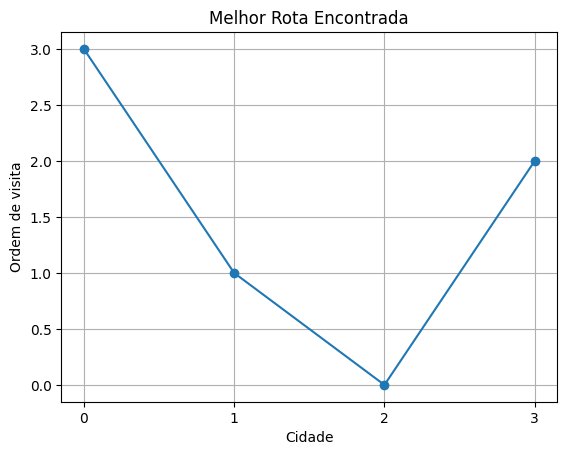

Melhor rota encontrada: [3, 1, 0, 2]
Custo da melhor rota: 50


In [7]:
# 6. Visualizar a solução encontrada:

# Plot da melhor rota encontrada
x = [i for i in range(len(best_path))]
y = [best_path[i] for i in range(len(best_path))]
plt.plot(x, y, marker='o')
plt.xticks(range(len(best_path)))
plt.xlabel('Cidade')
plt.ylabel('Ordem de visita')
plt.title('Melhor Rota Encontrada')
plt.grid(True)
plt.show()

print("Melhor rota encontrada:", best_path)
print("Custo da melhor rota:", best_path_cost)

# **Atividade:  Explorando Parâmetros do ACO**

Vamos realizar algumas alterações no códido acima para entender o comportamento do algoritmo. Documente os resultados em um doc ou pdf. Mostre o print e dê uma breve explicação do que ocorreu em cada etapa.

1. Número de Formigas (num_ants): Altere o número de formigas utilizadas no algoritmo ACO e observe como isso afeta a convergência e a qualidade da solução encontrada.

2. Taxa de Evaporação (evaporation_rate): Varie a taxa de evaporação do feromônio e observe como isso influencia a capacidade do algoritmo de explorar o espaço de busca e evitar convergir prematuramente para soluções subótimas.

3. Parâmetro Alpha (alpha): Modifique o parâmetro alpha, que controla a importância do feromônio na escolha do próximo nó, e analise como isso afeta a exploração do espaço de busca.

4. Parâmetro Beta (beta): Altere o parâmetro beta, que controla a influência da distância na escolha do próximo nó, e observe como isso afeta a exploração e a explotação do algoritmo.

5. Número de Iterações (num_iterations): Aumente ou diminua o número de iterações do algoritmo e analise como isso afeta o tempo de execução e a qualidade da solução encontrada.